<div class='alert alert-success'>
    <h1 align="center">Advanced Optimization Methods</h1> 
    <h3 align="center"> Machine Learning Course (Fall 2018)</h3>
    <h5 align="center">Seyed Naser Razavi [ML2018](http://www.snrazavi.ir/ml-2018/)</h5>
</div>

## Advanced Optimization methods

- No need for learning rate hyper-parameter ($\alpha$).
- Usually converge much faster than gradient descent.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.optimize import minimize  # for optimization

### Cost function
The cost function is the function which we need to minimize.

In [2]:
def J(theta):
    return (theta[0] - 5) ** 2 + (theta[1] - 5) ** 2

#### Plot cost function

In [3]:
t0 = np.linspace(0, 10, 100)
t1 = np.linspace(0, 10, 100)

T0, T1 = np.meshgrid(t0, t1)
Z = (T0 - 5) ** 2 + (T1 - 5) ** 2

/var/folders/yp/6jvrnsq53596z8h0zc64zkn00000gn/T/ipykernel_32557/3830747189.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


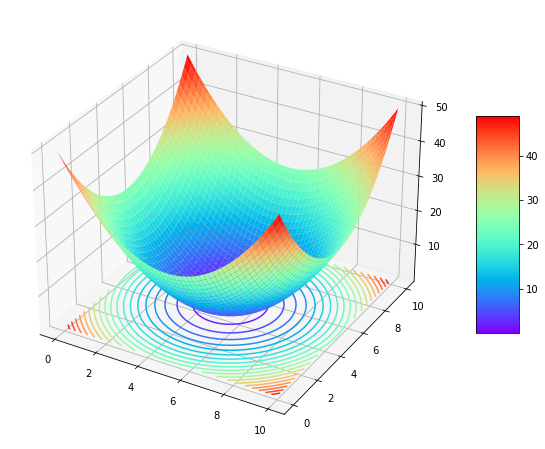

In [4]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T0, T1, Z, cmap=plt.cm.rainbow)
cset = ax.contour(T0, T1, Z, 20, zdir='z', offset=0, cmap=plt.cm.rainbow)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

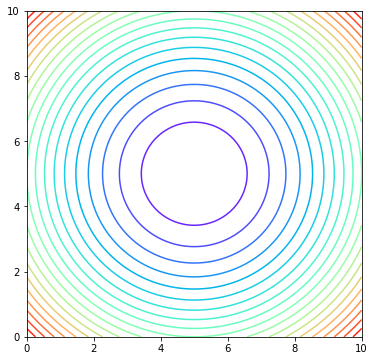

In [5]:
plt.figure(figsize=(6, 6))
cset = plt.contour(T0, T1, Z, 20, cmap=plt.cm.rainbow)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

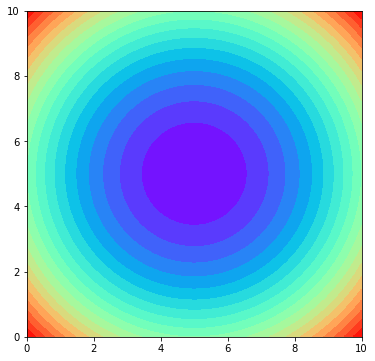

In [6]:
plt.figure(figsize=(6, 6))
cset = plt.contourf(T0, T1, Z, 20, cmap=plt.cm.rainbow)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

### Using `scipy.optimize.minimize`

After defining the cost function, we can use the `minimize` function from `scipy.optimize` to minimize the cost function.

To use the `minimize` function, we need to provide the following three arguments:
1. The first argument is the cost function itself.
2. The second argument is our initial guess.
3. The optimization method (`CG`, `BFGS`, ...)

In [7]:
minimize(J, x0=[0, 0], method='CG')

     fun: 2.4774723757749714e-18
     jac: array([1.71271317e-08, 1.71271317e-08])
 message: 'Optimization terminated successfully.'
    nfev: 15
     nit: 2
    njev: 5
  status: 0
 success: True
       x: array([5., 5.])

Another initial guess:

In [8]:
minimize(J, x0=[10, -3], method='CG')

     fun: 2.730455135196181e-16
     jac: array([ 1.12131602e-08, -1.79405912e-08])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 3
    njev: 12
  status: 0
 success: True
       x: array([5.        , 4.99999998])

Random initial guess:

In [9]:
minimize(J, x0=np.random.randn(2), method='CG')

     fun: 1.1102230246251565e-16
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 3
    njev: 7
  status: 0
 success: True
       x: array([4.99999999, 4.99999999])

Saving the outputs of the `minimize` function:

In [10]:
result = minimize(J, x0=np.random.randn(2), method='CG')

In [11]:
result.success

True

In [12]:
result.x  # solution

array([4.99999999, 4.99999999])

In [13]:
result.fun  # the minimum value of the cost function

1.1102230246251565e-16

Using other optimization methods:

In [14]:
minimize(J, x0=[0, 0], method='BFGS')

      fun: 3.5538794606501983e-16
 hess_inv: array([[ 0.75, -0.25],
       [-0.25,  0.75]])
      jac: array([-1.17592194e-08, -1.17592194e-08])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([4.99999999, 4.99999999])

Getting help:

In [15]:
# ??minimize

### Providing gradient information

In [16]:
def gradients(theta):
    return np.array([2 * (theta[0] - 5), 2 * (theta[1] - 5)])

In [17]:
gradients([5, 5])

array([0, 0])

In [18]:
minimize(J, x0=np.random.randn(2), method='CG', jac=gradients)

     fun: 0.0
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 5
     nit: 2
    njev: 5
  status: 0
 success: True
       x: array([5., 5.])